In [1]:
import pandas as pd
import urllib.request

data = pd.read_csv('../../twitter/tweetdata/2019_down1_tweet.csv', error_bad_lines=False)
data = data.append(pd.read_csv('../../twitter/tweetdata/2019_down1_tweet(e).csv', error_bad_lines=False))


In [2]:
text = data[['text']].astype(str)
text['text'] = text.apply(lambda row: row['text'].replace("/"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("-"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("—"," "), axis=1)
#text['main article'] = text.apply(lambda row: row['main article'].replace("",""), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("*"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("…"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("\\"," "), axis=1)



In [3]:
import nltk
text['text'] = text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

In [4]:
text['text']

0    [Mr., President, ,, you, are, misled, by, fake...
1    [Mr., President, ,, you, are, misled, by, fake...
2    [#, TRON, weekly, review, 1, ., @, TRON_JPN, l...
3    [., @, opera, browser, has, added, support, fo...
4                                                  [)]
                           ...                        
2    [Ethereum, 's, ``, market, share, '', vs, Bitc...
3    [Proxy, for, #, Bitcoin, vs, #, Ethereum, deve...
4    [Thrilled, to, be, attending, @, dappcon_berli...
5    [Testimonials, from, users, who, are, already,...
6    [2019, has, been, the, year, of, @, austingrif...
Name: text, Length: 287, dtype: object

In [5]:
# 소문자 적용 , - 문자 삭제
text['text'] = text['text'].apply(lambda x : [word.lower().replace("-","") for word in x])
# 공백문자 삭제
text['text'] = text['text'].apply(lambda x : [word for word in x if word])

In [6]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['text']), axis=1)

In [7]:
text['pos tag']

0    [(mr., NN), (president, NN), (,, ,), (you, PRP...
1    [(mr., NN), (president, NN), (,, ,), (you, PRP...
2    [(#, #), (tron, JJ), (weekly, JJ), (review, NN...
3    [(., .), (@, CC), (opera, NN), (browser, NN), ...
4                                             [(), ))]
                           ...                        
2    [(ethereum, NN), ('s, POS), (``, ``), (market,...
3    [(proxy, NN), (for, IN), (#, #), (bitcoin, NN)...
4    [(thrilled, VBN), (to, TO), (be, VB), (attendi...
5    [(testimonials, NNS), (from, IN), (users, NNS)...
6    [(2019, CD), (has, VBZ), (been, VBN), (the, DT...
Name: pos tag, Length: 287, dtype: object

In [8]:
# 불용어 품사 제거
text['text'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

In [9]:
text['text']

0    [mr., president, ,, are, misled, fake, news, ....
1    [mr., president, ,, are, misled, fake, news, ....
2    [#, tron, weekly, review, ., @, tron_jpn, laun...
3    [., opera, browser, has, added, support, #, bi...
4                                                  [)]
                           ...                        
2    [ethereum, 's, ``, market, share, '', vs, bitc...
3    [proxy, #, bitcoin, vs, #, ethereum, developer...
4    [thrilled, be, attending, @, dappcon_berlin, n...
5    [testimonials, users, are, seeing, benefit, us...
6    [has, been, year, @, austingriffith, 's, burne...
Name: text, Length: 287, dtype: object

In [10]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['text'] = text['text'].apply(lambda x: [word for word in x if word not in (stop)])

In [11]:
import csv
stopword_list =[]
f = open('../../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['text'] = text['text'].apply(lambda x: [word for word in x if word not in stopword_list])

In [12]:
import re
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['text'] = text['text'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


In [13]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

In [14]:
native_number_pattern=re.compile(r'[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

In [15]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['text'] = text['text'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

In [16]:
from nltk.stem import WordNetLemmatizer
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사
#print(text)

In [17]:
tokenized_doc = text['text'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [18]:
article_contents = tokenized_doc.values.tolist()

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [20]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [21]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [22]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [23]:
word2id = defaultdict(lambda: 0)

In [24]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [25]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [26]:
len(tf_idf_result)

1441

In [27]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

1441


In [28]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [29]:
import gensim
NUM_TOPICS = 4 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=50) 
# passes is similar with epoch , iterarion : loop per document
topics = ldamodel.print_topics(num_words=8)
for topic in topics:
    print(topic)

(0, '0.002*"intelligent" + 0.002*"risk" + 0.002*"join" + 0.002*"successful" + 0.002*"prop" + 0.002*"useful" + 0.002*"train" + 0.002*"tandem"')
(1, '0.002*"centralise" + 0.002*"humanity" + 0.002*"content" + 0.002*"queen" + 0.002*"visibility" + 0.002*"prague" + 0.002*"demand" + 0.002*"assume"')
(2, '0.002*"seat" + 0.002*"afaik" + 0.002*"clean" + 0.002*"opine" + 0.002*"right" + 0.002*"method" + 0.002*"data" + 0.002*"\'bitcoin"')
(3, '0.002*"require" + 0.002*"journalist" + 0.002*"close" + 0.002*"anything" + 0.002*"firm" + 0.002*"buttcoinism" + 0.002*"farbood" + 0.002*"conservative"')


In [30]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [31]:
sentences = article_contents

In [32]:
from gensim.models import Word2Vec

In [33]:
model = Word2Vec(sentences, min_count=1)

In [34]:
len(model.wv.vocab)

1441

In [35]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [36]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [37]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [38]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [39]:
temp_cluster_result['cluster'] = assigned_clusters

In [40]:
temp_cluster_result['raw_data'] = X.tolist()

In [41]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [42]:
from sklearn.metrics import pairwise_distances

In [43]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [44]:
len(cosine_centroid_list)

1441

In [45]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [46]:
sum(temp_distance[3])

1375.5312264298495

In [47]:
import scipy.spatial.distance as dist

In [48]:
dist.cosine(X[0],cosine_centroid_list[0])

0.8603298699816458

In [49]:
dist.euclidean(X[0],cosine_centroid_list[0])

0.02735229939669333

In [50]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [51]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [52]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
156,"[0.004712220281362534, 0.002467305166646838, -...",hashtag,0,"[0.00018924335, -0.00027951843, -0.00037947384...",0.557126,0.002723,1.554402,NaN
19,"[-0.00029290118254721165, -0.00144556188024580...",tron,0,"[0.00018924335, -0.00027951843, -0.00037947384...",0.617991,0.013617,1.604374,NaN
200,"[-0.0010887749958783388, -0.004926552064716816...",trade,0,"[0.00018924335, -0.00027951843, -0.00037947384...",0.657382,0.046297,1.611085,NaN
525,"[-0.0037511782720685005, 0.0014323547948151827...",stop,0,"[0.00018924335, -0.00027951843, -0.00037947384...",0.646906,0.013617,1.633289,NaN
6,"[-0.0025826895143836737, -0.003624932141974568...",happen,0,"[0.00018924335, -0.00027951843, -0.00037947384...",0.662928,0.027234,1.635695,NaN
1162,"[0.0024960411246865988, -0.0024139070883393288...",expect,0,"[0.00018924335, -0.00027951843, -0.00037947384...",0.646549,0.002723,1.643825,NaN
318,"[-0.00456557422876358, 0.004043583292514086, -...",satoshis,0,"[0.00018924335, -0.00027951843, -0.00037947384...",0.663655,0.002723,1.660932,NaN
95,"[0.0007488951669074595, -0.0032200696878135204...",explosion,0,"[0.00018924335, -0.00027951843, -0.00037947384...",0.665814,0.002723,1.663091,NaN
112,"[0.0034216863568872213, -0.0018377364613115788...",tech,0,"[0.00018924335, -0.00027951843, -0.00037947384...",0.692245,0.024510,1.667734,NaN
443,"[-0.0005904973950237036, -0.00496806250885129,...",accumulate,0,"[0.00018924335, -0.00027951843, -0.00037947384...",0.677748,0.005447,1.672301,NaN


In [53]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
333,"[0.004848479758948088, 0.000548768846783787, 0...",incredible,1,"[7.0541105e-06, -7.717371e-05, 0.0009322523, 0...",0.547884,0.005447,1.542437,NaN
303,"[-0.002992509864270687, -0.003468880197033286,...",gold,1,"[7.0541105e-06, -7.717371e-05, 0.0009322523, 0...",0.676928,0.117105,1.559822,NaN
1323,"[-0.004268759395927191, -0.0031630804296582937...",casascius,1,"[7.0541105e-06, -7.717371e-05, 0.0009322523, 0...",0.577813,0.013617,1.564196,NaN
382,"[0.002221160801127553, 0.002477966947481036, -...",full,1,"[7.0541105e-06, -7.717371e-05, 0.0009322523, 0...",0.662075,0.005447,1.656628,NaN
270,"[0.0009891606168821454, 0.004323070868849754, ...",mnuchin,1,"[7.0541105e-06, -7.717371e-05, 0.0009322523, 0...",0.677220,0.016340,1.660879,NaN
639,"[-9.566716471454129e-05, -0.003887255908921361...",epiphany,1,"[7.0541105e-06, -7.717371e-05, 0.0009322523, 0...",0.664653,0.002723,1.661930,NaN
767,"[0.002076556673273444, -0.0024548335932195187,...",maintainer,1,"[7.0541105e-06, -7.717371e-05, 0.0009322523, 0...",0.666692,0.002723,1.663968,NaN
202,"[0.002258333843201399, 0.00037523379432968795,...",fiat,1,"[7.0541105e-06, -7.717371e-05, 0.0009322523, 0...",0.710548,0.029957,1.680591,NaN
1128,"[0.0033328465651720762, 0.003429654287174344, ...",federate,1,"[7.0541105e-06, -7.717371e-05, 0.0009322523, 0...",0.691667,0.010894,1.680773,NaN
358,"[0.00306271412409842, 0.004251189064234495, 0....",approve,1,"[7.0541105e-06, -7.717371e-05, 0.0009322523, 0...",0.689291,0.005447,1.683845,NaN


In [54]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(30)   # 부정

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
1387,"[0.00201594945974648, 0.001427832874469459, -0...",bear,2,"[0.00011688837, -0.0004926443, -0.0003500902, ...",0.462646,0.002723,1.459923,NaN
1341,"[-0.0029231589287519455, -0.00451629376038909,...",guest,2,"[0.00011688837, -0.0004926443, -0.0003500902, ...",0.525595,0.002723,1.522872,NaN
108,"[0.0038045356050133705, -0.0046125962398946285...",http,2,"[0.00011688837, -0.0004926443, -0.0003500902, ...",0.667372,0.051744,1.615628,NaN
216,"[0.0021601589396595955, -0.0010361337335780263...",global,2,"[0.00011688837, -0.0004926443, -0.0003500902, ...",0.653057,0.019064,1.633993,NaN
586,"[0.0025491227861493826, 0.0007610705215483904,...",high,2,"[0.00011688837, -0.0004926443, -0.0003500902, ...",0.678234,0.043574,1.634660,NaN
776,"[-0.003279222408309579, -0.005463325418531895,...",course,2,"[0.00011688837, -0.0004926443, -0.0003500902, ...",0.663580,0.008170,1.655410,NaN
12,"[0.0026844555977731943, -0.005597230512648821,...",crypto,2,"[0.00011688837, -0.0004926443, -0.0003500902, ...",0.748724,0.092595,1.656129,NaN
1269,"[-0.004543906543403864, -0.0016270718770101666...",switch,2,"[0.00011688837, -0.0004926443, -0.0003500902, ...",0.667666,0.002723,1.664943,NaN
486,"[0.0014919607201591134, -0.002236825181171298,...",point,2,"[0.00011688837, -0.0004926443, -0.0003500902, ...",0.676234,0.010894,1.665340,NaN
522,"[7.85151933087036e-05, -0.004490233957767487, ...",discount,2,"[0.00011688837, -0.0004926443, -0.0003500902, ...",0.675721,0.002723,1.672998,NaN


In [55]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(30)  # 거래소, 돈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
4,"[-0.005533702205866575, -0.002520838053897023,...",bitcoin,3,"[-0.00047598148, -0.000492431, -0.0006101764, ...",0.523173,0.923226,0.599947,NaN
331,"[-0.0014343761140480638, -0.000219141686102375...",idea,3,"[-0.00047598148, -0.000492431, -0.0006101764, ...",0.574585,0.013617,1.560968,NaN
171,"[-0.0036838692612946033, -0.001070552156306803...",money,3,"[-0.00047598148, -0.000492431, -0.0006101764, ...",0.664887,0.068085,1.596802,NaN
1031,"[-0.0035563965793699026, -0.002899983432143926...",flat,3,"[-0.00047598148, -0.000492431, -0.0006101764, ...",0.629518,0.002723,1.626795,NaN
31,"[0.0007941161748021841, -0.0017811282305046916...",cryptocurrency,3,"[-0.00047598148, -0.000492431, -0.0006101764, ...",0.651117,0.013617,1.637500,NaN
91,"[-0.0018663201481103897, -0.004450441338121891...",start,3,"[-0.00047598148, -0.000492431, -0.0006101764, ...",0.670960,0.027234,1.643726,NaN
65,"[-0.004657750017940998, 0.0023255350533872843,...",positive,3,"[-0.00047598148, -0.000492431, -0.0006101764, ...",0.656535,0.005447,1.651088,NaN
201,"[-0.0026845282409340143, -0.001488172565586865...",sell,3,"[-0.00047598148, -0.000492431, -0.0006101764, ...",0.679192,0.027234,1.651958,NaN
192,"[-0.0011163162998855114, 0.00145496497862041, ...",trezor,3,"[-0.00047598148, -0.000492431, -0.0006101764, ...",0.671254,0.010894,1.660360,NaN
572,"[-0.005112452432513237, -0.0040707457810640335...",code,3,"[-0.00047598148, -0.000492431, -0.0006101764, ...",0.694691,0.029957,1.664734,NaN


In [56]:
y_km = temp_cluster_result['cluster'].values

In [57]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

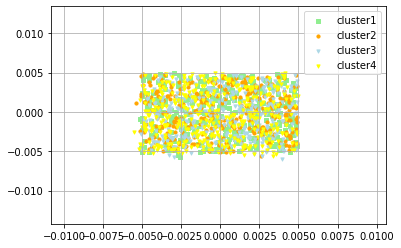

In [58]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [59]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 이슈

363

In [60]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 기타

349

In [61]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 부정

359

In [62]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 거래소 돈

370

In [63]:
temp_cluster_result['category'] = 1 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 5 # 이슈
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 13 # 기타
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label'] = 2 # 부정
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 12 # 거래소,돈

In [64]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [65]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [66]:
kmeans.inertia_

1.1764075685623916

In [67]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[3 1 0 ... 3 0 3]


In [68]:
cluster_values= list(model.wv.vocab)

In [69]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-1.1764076


In [70]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [71]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.008617404


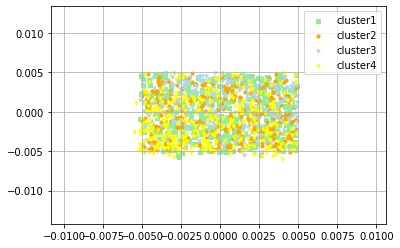

In [72]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [73]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [74]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [75]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [76]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [77]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [78]:
import scipy.spatial.distance as dist

In [79]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [80]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [81]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
323,"[0.004203855525702238, -0.0016571114538237453,...",market,0,"[0.00025710883, -0.00030299817, 0.00017242727,...",0.032460,0.059914,0.972546,NaN
322,"[0.004060978069901466, 0.002621556632220745, 0...",world,0,"[0.00025710883, -0.00030299817, 0.00017242727,...",0.027160,0.043574,0.983586,NaN
277,"[0.00021419981203507632, -0.001685673254542052...",want,0,"[0.00025710883, -0.00030299817, 0.00017242727,...",0.027901,0.035404,0.992497,NaN
537,"[0.002717899391427636, 0.0012807914754375815, ...",keiser,0,"[0.00025710883, -0.00030299817, 0.00017242727,...",0.025659,0.032681,0.992978,NaN
24,"[9.196165046887472e-05, 0.0015210307901725173,...",term,0,"[0.00025710883, -0.00030299817, 0.00017242727,...",0.029868,0.035404,0.994464,NaN
205,"[0.0023845320101827383, 0.0007287853513844311,...",give,0,"[0.00025710883, -0.00030299817, 0.00017242727,...",0.029459,0.032681,0.996779,NaN
6,"[-0.0025826895143836737, -0.003624932141974568...",happen,0,"[0.00025710883, -0.00030299817, 0.00017242727,...",0.030345,0.027234,1.003111,NaN
9,"[-0.0020365212112665176, -0.001966142328456044...",love,0,"[0.00025710883, -0.00030299817, 0.00017242727,...",0.028024,0.024510,1.003514,NaN
444,"[-0.0004379729798529297, 0.001654634135775268,...",fast,0,"[0.00025710883, -0.00030299817, 0.00017242727,...",0.028565,0.024510,1.004054,NaN
1030,"[0.0008349288837052882, -0.004950270522385836,...",adoption,0,"[0.00025710883, -0.00030299817, 0.00017242727,...",0.029144,0.024510,1.004634,NaN


In [82]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(30,'score') # 제도

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
159,"[0.002551131881773472, -0.0026162369176745415,...",trump,1,"[9.538508e-05, -0.00028398744, 0.00029981474, ...",0.028173,0.065361,0.962811,NaN
233,"[-0.0025204787962138653, -0.001805908628739416...",become,1,"[9.538508e-05, -0.00028398744, 0.00029981474, ...",0.028924,0.029957,0.998967,NaN
104,"[-0.0026450245641171932, 0.000872995937243104,...",work,1,"[9.538508e-05, -0.00028398744, 0.00029981474, ...",0.029092,0.027234,1.001858,NaN
112,"[0.0034216863568872213, -0.0018377364613115788...",tech,1,"[9.538508e-05, -0.00028398744, 0.00029981474, ...",0.029236,0.024510,1.004726,NaN
256,"[0.003539374563843012, -0.0015435082605108619,...",government,1,"[9.538508e-05, -0.00028398744, 0.00029981474, ...",0.029323,0.024510,1.004812,NaN
23,"[0.001835628179833293, -0.0005192662938497961,...",launch,1,"[9.538508e-05, -0.00028398744, 0.00029981474, ...",0.026686,0.021787,1.004899,NaN
62,"[-0.003921434283256531, 0.0034332298673689365,...",look,1,"[9.538508e-05, -0.00028398744, 0.00029981474, ...",0.028984,0.021787,1.007197,NaN
230,"[0.0013431685511022806, 0.00042718369513750076...",sign,1,"[9.538508e-05, -0.00028398744, 0.00029981474, ...",0.027315,0.019064,1.008251,NaN
346,"[0.0018204631051048636, -0.0009999341564252973...",bullish,1,"[9.538508e-05, -0.00028398744, 0.00029981474, ...",0.027959,0.019064,1.008895,NaN
1028,"[-0.0001678567787166685, -0.002912607043981552...",cycle,1,"[9.538508e-05, -0.00028398744, 0.00029981474, ...",0.027989,0.019064,1.008925,NaN


In [83]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(40,'score')  # 인플 

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
150,"[0.0020346210803836584, -0.0005587118794210255...",year,2,"[0.00015940555, 0.0004717304, -4.9956456e-05, ...",0.031293,0.049021,0.982273,NaN
278,"[-0.0023344873916357756, 0.0032370449043810368...",right,2,"[0.00015940555, 0.0004717304, -4.9956456e-05, ...",0.028271,0.027234,1.001038,NaN
161,"[-0.0005060754483565688, 0.003069187281653285,...",tweet,2,"[0.00015940555, 0.0004717304, -4.9956456e-05, ...",0.028812,0.027234,1.001578,NaN
32,"[-0.004431313835084438, -0.004269068129360676,...",wallet,2,"[0.00015940555, 0.0004717304, -4.9956456e-05, ...",0.029359,0.027234,1.002126,NaN
176,"[-0.0034135936293751, -0.003664568532258272, 0...",value,2,"[0.00015940555, 0.0004717304, -4.9956456e-05, ...",0.030142,0.027234,1.002909,NaN
535,"[-0.002727283863350749, 0.00036429258761927485...",hard,2,"[0.00015940555, 0.0004717304, -4.9956456e-05, ...",0.030170,0.027234,1.002936,NaN
343,"[0.004594337195158005, -0.0005777794285677373,...",asset,2,"[0.00015940555, 0.0004717304, -4.9956456e-05, ...",0.027987,0.021787,1.006200,NaN
1037,"[0.0043233525939285755, 0.001477984944358468, ...",physical,2,"[0.00015940555, 0.0004717304, -4.9956456e-05, ...",0.026329,0.019064,1.007266,NaN
420,"[-0.0037679290398955345, -0.001776988501660525...",store,2,"[0.00015940555, 0.0004717304, -4.9956456e-05, ...",0.029227,0.021787,1.007440,NaN
271,"[0.0008848579600453377, -0.001945357071235776,...",tell,2,"[0.00015940555, 0.0004717304, -4.9956456e-05, ...",0.032018,0.024510,1.007508,NaN


In [84]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 투자 

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
4,"[-0.005533702205866575, -0.002520838053897023,...",bitcoin,3,"[-0.00073898135, -0.0012773892, -0.00091541995...",0.033978,0.923226,0.110752,NaN
303,"[-0.002992509864270687, -0.003468880197033286,...",gold,3,"[-0.00073898135, -0.0012773892, -0.00091541995...",0.029316,0.117105,0.912210,NaN
12,"[0.0026844555977731943, -0.005597230512648821,...",crypto,3,"[-0.00073898135, -0.0012773892, -0.00091541995...",0.027290,0.092595,0.934695,NaN
155,"[-0.0006468836218118668, -0.004660498350858688...",good,3,"[-0.00073898135, -0.0012773892, -0.00091541995...",0.029555,0.070808,0.958747,NaN
171,"[-0.0036838692612946033, -0.001070552156306803...",money,3,"[-0.00073898135, -0.0012773892, -0.00091541995...",0.027718,0.068085,0.959633,NaN
66,"[-0.004546169191598892, -0.0051108612678945065...",price,3,"[-0.00073898135, -0.0012773892, -0.00091541995...",0.031601,0.054468,0.977133,NaN
108,"[0.0038045356050133705, -0.0046125962398946285...",http,3,"[-0.00073898135, -0.0012773892, -0.00091541995...",0.029200,0.051744,0.977456,NaN
200,"[-0.0010887749958783388, -0.004926552064716816...",trade,3,"[-0.00073898135, -0.0012773892, -0.00091541995...",0.028575,0.046297,0.982277,NaN
50,"[-0.0014248882653191686, 0.0008514524670317769...",people,3,"[-0.00073898135, -0.0012773892, -0.00091541995...",0.028691,0.046297,0.982393,NaN
48,"[-0.003473012475296855, -0.001673501217737794,...",time,3,"[-0.00073898135, -0.0012773892, -0.00091541995...",0.031436,0.049021,0.982415,NaN


In [85]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) #투자

398

In [86]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) #제도

338

In [87]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) #인플

360

In [88]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) #투자

345

In [91]:
temp_cluster_result1['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 11 # 투자
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 10 # 제도
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 6 # 인플
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 11 # 투자

In [92]:
temp_cluster_result1['result'] = 2 # 1 상승 2 하락 3 보합
temp_cluster_result['result'] = 2
temp_cluster_result1['Silhouette'] = 0.00864853 # 1 상승 2 하락 3 보합
temp_cluster_result['Silhouette'] = 0.00864853

In [93]:
temp_cluster_result1.to_csv("../cluster/twitter/twitter_2019_down1_euclidean.csv")
temp_cluster_result.to_csv("../cluster/twitter/twitter_2019_down1_cosine.csv")

In [93]:
word_vectors = model.wv

In [94]:
vocabs = word_vectors.vocab.keys()

In [95]:
word_vector_list = [word_vectors[v]for v in vocabs]

In [96]:
print(word_vectors.similarity(w1='little',w2='push'))

0.99857104


In [97]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
xys = pca.fit_transform(word_vector_list)

In [98]:
xys

array([[ 1.91762854e+00,  1.00464941e-04],
       [ 2.41042694e-01,  1.30420782e-03],
       [ 1.59111222e+00,  3.57644364e-03],
       ...,
       [-3.11496146e-01,  2.03772445e-03],
       [-3.11973668e-01,  2.79474988e-03],
       [-2.83442870e-01, -1.34272206e-03]])

In [99]:
xys[:,0]

array([ 1.91762854,  0.24104269,  1.59111222, ..., -0.31149615,
       -0.31197367, -0.28344287])

In [100]:
xys[:,1]

array([ 0.00010046,  0.00130421,  0.00357644, ...,  0.00203772,
        0.00279475, -0.00134272])

In [101]:
xs = xys[:,0]
ys = xys[:,1]

In [102]:
def plot_2d_graph(vocabs,xs,ys) :
    plt.figure(figsize=(8,6))
    plt.scatter(xs,ys,marker='o')
    for i,v in enumerate(vocabs) :
        plt.annotate(v,xy=(xs[i],ys[i]))

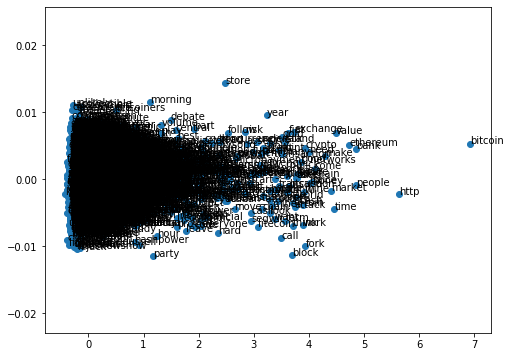

In [103]:
plot_2d_graph(vocabs,xs,ys)

In [100]:
nltk.help.upenn_tagset

<function nltk.help.upenn_tagset(tagpattern=None)>